# TensorFlow Hello World 平面拟合

http://www.tensorfly.cn/tfdoc/get_started/introduction.html

### 使用 NumPy 生成假数据(phony data), 总共 100 个点.

`x_data` 是二维数组，每个维度各 100 个点，定义了一个平面

In [1]:
import tensorflow as tf
import numpy as np

x_data = np.float32(np.random.rand(2, 100)) # 随机输入
x_data[0][:10]

array([0.35073978, 0.16348423, 0.7059651 , 0.7696817 , 0.4036316 ,
       0.52306384, 0.8748454 , 0.52280265, 0.9512267 , 0.10213694],
      dtype=float32)

In [2]:
x_data[1][:10]

array([0.33513898, 0.07861521, 0.58426493, 0.87010854, 0.24188931,
       0.64622885, 0.39593607, 0.4805421 , 0.6906034 , 0.41190282],
      dtype=float32)

`y_data` 由 `x_data` 经过变换得到，`np.dot` 实现矩阵乘法，要求第一个矩阵的列数和第二个矩阵的行数相同，最后加一个偏移量

比如 `y_data[0]` 就等于 `x_data[0][0]*0.1 + x_data[1][0]*0.2 +0.3`

这里整体的效果，相当于对原始的平面在三维空间进行了一个倾斜旋转，倾斜的参数由一个权重 `W=[0.1, 0.2]` 和偏移量 `b=0.3` 来确定

In [3]:
y_data = np.dot([0.100, 0.200], x_data) + 0.300
y_data[:10]

array([0.40210177, 0.33207147, 0.4874495 , 0.55098988, 0.38874102,
       0.48155215, 0.46667175, 0.44838868, 0.53324335, 0.39259426])

### 原始数据可视化

使用 matplotlib 的 `scatter` 功能实现 3D 散点图，x 轴是 `x_data[0]`, y 轴是 `x_data[1]`，z 轴是 `y_data`

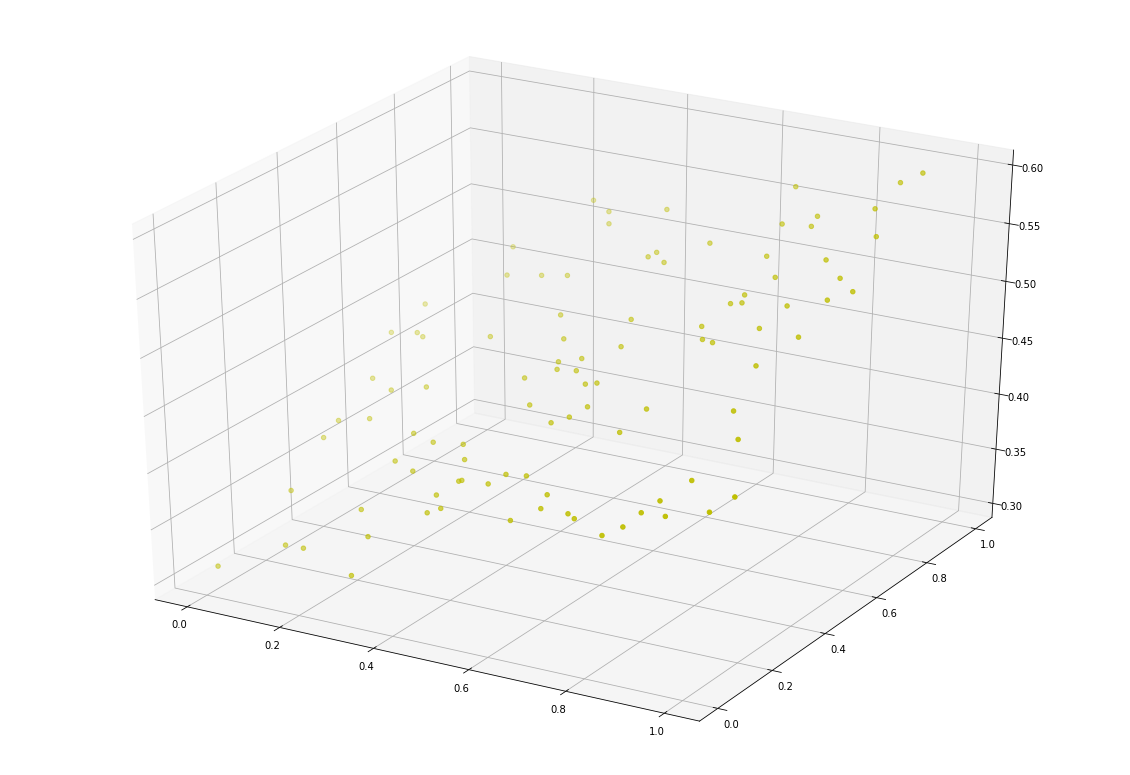

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = x_data[0], x_data[1], y_data
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='y')
plt.show()

### 构造一个线性模型

线性模型一般由权重 `W` 和偏移量 `b` 来描述，平面上直线拟合 `W` 是一个标量数字，而本例在三维空间进行平面拟合，所以 `W` 是一个有两个分量的向量。

In [5]:
b = tf.Variable(tf.zeros([1]))
b

Instructions for updating:
Colocations handled automatically by placer.


<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>

In [6]:
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
W

<tf.Variable 'Variable_1:0' shape=(1, 2) dtype=float32_ref>

y 是模拟的结果，`tf.matmul` 将矩阵 `A` 乘以矩阵 `B`，生成 `A * B`，最后加上偏移量 `b`

In [7]:
y = tf.matmul(W, x_data) + b
y

<tf.Tensor 'add:0' shape=(1, 100) dtype=float32>

### 最小化方差

定义损失函数，线性回归里常用的是均方误差，就是真实值和预测值的差的平方和

In [8]:
loss = tf.reduce_mean(tf.square(y - y_data))

定义优化器，这里使用梯度下降算法

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

使用指定的优化器和损失函数定义一个训练

In [10]:
train = optimizer.minimize(loss)

### 初始化变量

In [11]:
init = tf.global_variables_initializer()

### 启动图 (graph)

In [12]:
sess = tf.Session()
sess.run(init)

### 拟合平面

我们知道真实的 `W` 为 `[0.1, 0.2]`，`b` 为 `0.3`，看下迭代训练 200 次的拟合效果怎么样

In [13]:
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[ 0.8425213  -0.12354811]] [0.13099673]
20 [[0.289453   0.12614608]] [0.2357107]
40 [[0.15044135 0.18556874]] [0.28013656]
60 [[0.11361164 0.19769716]] [0.29380444]
80 [[0.10372839 0.1998468 ]] [0.29805225]
100 [[0.10103785 0.20009856]] [0.2993837]
120 [[0.1002938  0.20006898]] [0.29980397]
140 [[0.1000846  0.20003161]] [0.2999374]
160 [[0.10002476 0.20001256]] [0.29997995]
180 [[0.10000735 0.20000464]] [0.29999357]
200 [[0.10000221 0.20000164]] [0.29999793]


这里迭代 200 次的结果 `W` 为 `[0.09, 0.19]`, `b` 为 `0.30`，可以看出跟真实值差别非常小了

### 拟合效果可视化

https://stackoverflow.com/questions/20699821/find-and-draw-regression-plane-to-a-set-of-points

把原始的分布在三维空间的点，组成一个个的三元组，分别表示 x, y, z 的坐标值

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

points = list(zip(x_data[0],x_data[1],y_data))
points[:10]

[(0.35073978, 0.33513898, 0.40210177302360534),
 (0.16348423, 0.07861521, 0.33207146525382997),
 (0.7059651, 0.58426493, 0.4874494969844818),
 (0.7696817, 0.87010854, 0.5509898781776428),
 (0.4036316, 0.24188931, 0.3887410223484039),
 (0.52306384, 0.64622885, 0.4815521538257599),
 (0.8748454, 0.39593607, 0.4666717529296875),
 (0.52280265, 0.4805421, 0.44838868379592894),
 (0.9512267, 0.6906034, 0.5332433462142945),
 (0.10213694, 0.41190282, 0.3925942569971085)]

In [15]:
w_val = sess.run(W)
b_val = sess.run(b)

In [16]:
def cross(a, b):
    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

def show(points, a, b, c):
    # 定义画布
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制原始的散点
    xs, ys, zs = zip(*points)
    ax.scatter(xs, ys, zs)

    # 绘制拟合平面
    point  = np.array([0.0, 0.0, c])
    normal = np.array(cross([1,0,a], [0,1,b]))
    d = -point.dot(normal)
    xx, yy = np.meshgrid([0,1], [0,1])
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    ax.plot_surface(xx, yy, z, alpha=0.2, color=[0,1,0])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()    


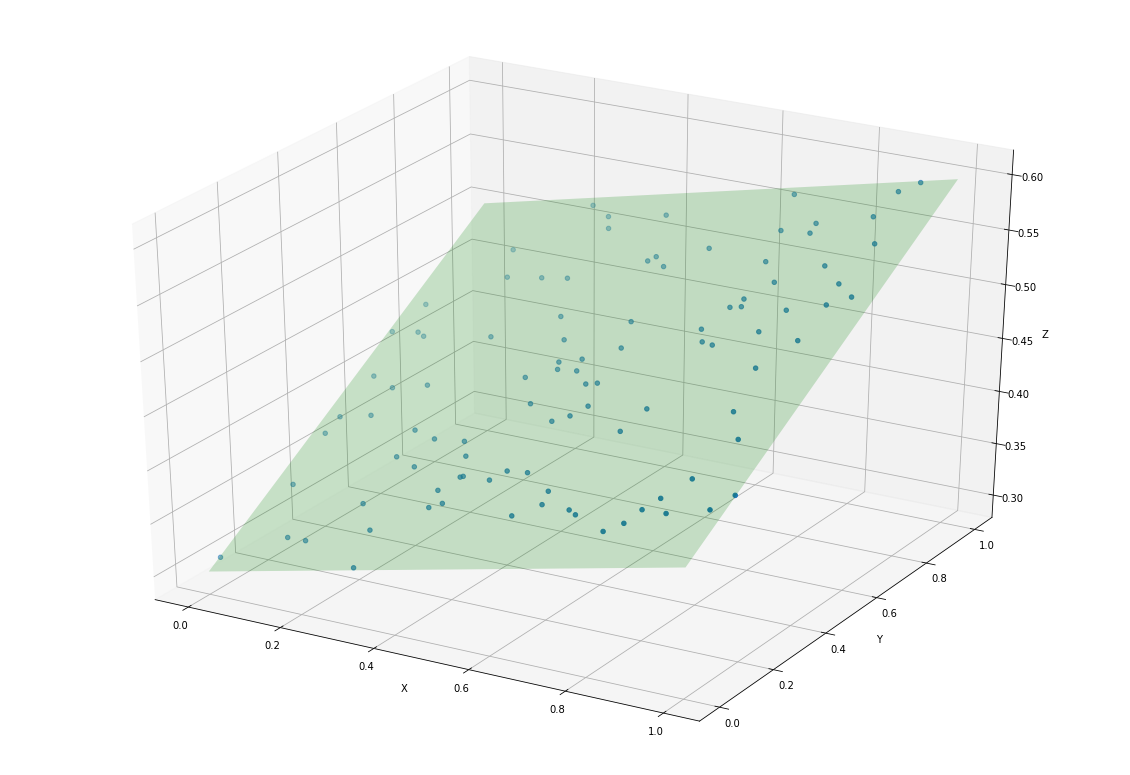

In [17]:
show(points, w_val[0][0],w_val[0][1],b_val[0])